In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [31]:
aqi = pd.read_csv('c4_epa_air_quality.csv')

In [32]:
aqi = aqi.dropna()
aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [33]:
print("Use describe() to summarize AQI")
print(aqi.describe(include='all'))
print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

Use describe() to summarize AQI
        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   257.000000         257         257          257            257   
unique         NaN           1          51          148            188   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         257          66           14             21   
mean    129.766537         NaN         NaN          NaN            NaN   
std      74.675286         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      66.000000         NaN         NaN          NaN            NaN   
50%     130.000000         NaN         NaN          NaN            NaN   
75%     194.000000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \


In [34]:
# Create a list of RRE states.
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']
# Subset `aqi` to only consider these states.
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]
aqi_rre.groupby(['state_name']).agg({'aqi': 'mean', 'state_name': 'count'})

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,3.000000,9
Texas,2.700000,10


<Axes: xlabel='state_name', ylabel='aqi'>

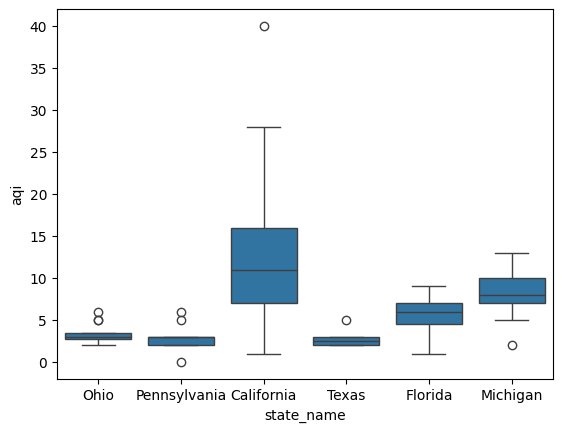

In [35]:
sns.boxplot(data=aqi_rre, x='state_name', y=aqi_rre['aqi'])
# plt.xticks(rotation=45)

In [36]:
aqi_ca = aqi_rre[aqi_rre['state_name'] == 'California']
aqi_sample_mean = aqi_ca['aqi'].mean()
aqi_sample_mean

np.float64(12.121212121212121)

In [37]:
confindence_level = 0.95

In [38]:
standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

standard error:
0.8987209641127412


In [39]:
z_value = 1.96  # for 95% confidence level
margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

margin of error:
1.7614930896609726


In [40]:
stard_error = aqi_ca['aqi'].std() / np.sqrt(len(aqi_ca))
stard_error

np.float64(0.8987209641127412)

In [41]:
marzin_of_error = 1.96 * standard_error
print("marzin_of_error:")
print(marzin_of_error)

marzin_of_error:
1.7614930896609726


In [42]:
interval_lower = aqi_sample_mean - margin_of_error
interval_upper = aqi_sample_mean + margin_of_error
print(f"{confindence_level*100}% ({interval_lower}, {interval_upper})")

95.0% (10.359719031551148, 13.882705210873095)


In [44]:
constructive_interval = stats.norm.interval(confindence_level, loc=aqi_sample_mean, scale=standard_error)
print("constructive_interval:" + str(constructive_interval))

constructive_interval:(np.float64(10.359751399400034), np.float64(13.882672843024208))


In [ ]:
(  (  aqi_sample_mean - margin_of_error ) , ( aqi_sample_mean + margin_of_error )  )